<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/Logo.png?alt=media&token=06318ee3-d7a0-44a0-97ae-2c95f110e3ac" width="100" height="100" align="right"/>

## How to Reshape Input Data for Long Short-Term Memory Networks

### What's Covered?
<hr style="border:2px solid #E1F6FF"> </hr>

### 1. How to define a LSTM input layer

### 2. How to reshape multiple parallel series data for a LSTM input

### 3. How to build a LSTM model

<hr style="border:2px solid #E1F6FF"> </hr>

The input to every LSTM layer must be **three-dimensional**. The **three dimensions** of this input are:

> **Samples**. One sequence is one sample. A batch is comprised of one or more samples.<br>
><br>
> **Time Steps**. One time step is one point of observation in the sample.<br>
><br>
> **Features**. One feature is one observation at a time step.<br>

Reference: https://machinelearningmastery.com/reshape-input-data-long-short-term-memory-networks-keras/

### <font color='#34A853'>Import Dataset</font>
<hr style="border:2px solid #34A853"> </hr>

In [3]:
import pandas as pd
import numpy as np

Sources: https://aemo.com.au/energy-systems/electricity/national-electricity-market-nem/data-nem/aggregated-data

In [4]:
df=pd.read_csv('appended_test.csv')
df

,INDEX,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,0,VIC1,01-01-20 00:30,4185.32,64.76,TRADE
1,1,VIC1,01-01-20 01:00,4057.68,63.36,TRADE
2,2,VIC1,01-01-20 01:30,3954.85,65.21,TRADE
3,3,VIC1,01-01-20 02:00,3792.25,64.45,TRADE
4,4,VIC1,01-01-20 02:30,3689.33,63.23,TRADE
...,...,...,...,...,...,...
25099,283,VIC1,06-06-21 22:00,5010.37,28.22,TRADE
25100,284,VIC1,06-06-21 22:30,4780.72,8.40,TRADE
25101,285,VIC1,06-06-21 23:00,4579.63,4.38,TRADE
25102,286,VIC1,06-06-21 23:30,4715.11,8.34,TRADE


In [98]:
print(df.dtypes)

INDEX               int64
REGION             object
SETTLEMENTDATE     object
TOTALDEMAND       float64
RRP               float64
PERIODTYPE         object
dtype: object


In [5]:
df['Date Time'] = pd.to_datetime(df['SETTLEMENTDATE'], dayfirst=True)
df['Day'] = df['Date Time'].dt.day
df['Month'] = df['Date Time'].dt.month
df['Year'] = df['Date Time'].dt.year
df['Hour'] = df['Date Time'].dt.hour
df['Minute'] = df['Date Time'].dt.minute
df

,INDEX,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE,Date Time,Day,Month,Year,Hour,Minute
0,0,VIC1,01-01-20 00:30,4185.32,64.76,TRADE,2020-01-01 00:30:00,1,1,2020,0,30
1,1,VIC1,01-01-20 01:00,4057.68,63.36,TRADE,2020-01-01 01:00:00,1,1,2020,1,0
2,2,VIC1,01-01-20 01:30,3954.85,65.21,TRADE,2020-01-01 01:30:00,1,1,2020,1,30
3,3,VIC1,01-01-20 02:00,3792.25,64.45,TRADE,2020-01-01 02:00:00,1,1,2020,2,0
4,4,VIC1,01-01-20 02:30,3689.33,63.23,TRADE,2020-01-01 02:30:00,1,1,2020,2,30
...,...,...,...,...,...,...,...,...,...,...,...,...
25099,283,VIC1,06-06-21 22:00,5010.37,28.22,TRADE,2021-06-06 22:00:00,6,6,2021,22,0
25100,284,VIC1,06-06-21 22:30,4780.72,8.40,TRADE,2021-06-06 22:30:00,6,6,2021,22,30
25101,285,VIC1,06-06-21 23:00,4579.63,4.38,TRADE,2021-06-06 23:00:00,6,6,2021,23,0
25102,286,VIC1,06-06-21 23:30,4715.11,8.34,TRADE,2021-06-06 23:30:00,6,6,2021,23,30


In [6]:
print(df.dtypes)

INDEX                      int64
REGION                    object
SETTLEMENTDATE            object
TOTALDEMAND              float64
RRP                      float64
PERIODTYPE                object
Date Time         datetime64[ns]
Day                        int64
Month                      int64
Year                       int64
Hour                       int64
Minute                     int64
dtype: object


In [101]:
df['Demand'] = pd.to_numeric(df['TOTALDEMAND'], errors ='coerce')
df['Price'] = pd.to_numeric(df['RRP'], errors ='coerce')

Reference: https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html

In [102]:
print(df.dtypes)

INDEX                      int64
REGION                    object
SETTLEMENTDATE            object
TOTALDEMAND              float64
RRP                      float64
PERIODTYPE                object
Date Time         datetime64[ns]
Day                        int64
Month                      int64
Year                       int64
Hour                       int64
Minute                     int64
Demand                   float64
Price                    float64
dtype: object


In [103]:
df.drop(['TOTALDEMAND'], axis=1, inplace=True)
df.drop(['REGION'], axis=1, inplace=True)
df.drop(['SETTLEMENTDATE'], axis=1, inplace=True)
df.drop(['RRP'], axis=1, inplace=True)
df.drop(['PERIODTYPE'], axis=1, inplace=True)
df.drop(['Date Time'], axis=1, inplace=True)
df.drop(['INDEX'], axis=1, inplace = True)

df

,Day,Month,Year,Hour,Minute,Demand,Price
0,1,1,2020,0,30,4185.32,64.76
1,1,1,2020,1,0,4057.68,63.36
2,1,1,2020,1,30,3954.85,65.21
3,1,1,2020,2,0,3792.25,64.45
4,1,1,2020,2,30,3689.33,63.23
...,...,...,...,...,...,...,...
25099,6,6,2021,22,0,5010.37,28.22
25100,6,6,2021,22,30,4780.72,8.40
25101,6,6,2021,23,0,4579.63,4.38
25102,6,6,2021,23,30,4715.11,8.34


### <font color='#34A853'>Transform the Data</font>
<hr style="border:2px solid #34A853"> </hr>

In [141]:
X0=[]
X1=[]
X2=[]
X3=[]
X4=[]
X5=[]
X6=[]
y=[]

In [142]:
for i in range (0, df.shape[0]-48):
    X0.append(df.iloc[i:i + 48, 0])
    X1.append(df.iloc[i:i + 48, 1])
    X2.append(df.iloc[i:i + 48, 2])
    X3.append(df.iloc[i:i + 48, 3])
    X4.append(df.iloc[i:i + 48, 4])
    X5.append(df.iloc[i:i + 48, 5])
    X6.append(df.iloc[i:i + 48, 6])
    y.append(df.iloc[i + 48, 6])

In [143]:
type(X5)

list

In [144]:
X5

[0     4185.32
 1     4057.68
 2     3954.85
 3     3792.25
 4     3689.33
 5     3602.61
 6     3550.62
 7     3504.19
 8     3491.36
 9     3483.63
 10    3497.77
 11    3511.44
 12    3540.62
 13    3514.43
 14    3423.34
 15    3396.71
 16    3357.29
 17    3301.41
 18    3245.13
 19    3169.12
 20    3146.34
 21    3095.20
 22    3069.29
 23    3060.58
 24    3068.81
 25    3085.47
 26    3131.31
 27    3187.66
 28    3273.67
 29    3381.79
 30    3565.42
 31    3775.71
 32    3980.79
 33    4155.40
 34    4306.64
 35    4460.98
 36    4511.73
 37    4473.78
 38    4375.39
 39    4362.22
 40    4368.19
 41    4290.62
 42    4201.61
 43    4084.88
 44    3989.79
 45    3949.52
 46    4161.55
 47    4179.68
 Name: Demand, dtype: float64,
 1     4057.68
 2     3954.85
 3     3792.25
 4     3689.33
 5     3602.61
 6     3550.62
 7     3504.19
 8     3491.36
 9     3483.63
 10    3497.77
 11    3511.44
 12    3540.62
 13    3514.43
 14    3423.34
 15    3396.71
 16    3357.29
 17    33

In [107]:
df.head(50)

,Day,Month,Year,Hour,Minute,Demand,Price
0,1,1,2020,0,30,4185.32,64.76
1,1,1,2020,1,0,4057.68,63.36
2,1,1,2020,1,30,3954.85,65.21
3,1,1,2020,2,0,3792.25,64.45
4,1,1,2020,2,30,3689.33,63.23
5,1,1,2020,3,0,3602.61,61.91
6,1,1,2020,3,30,3550.62,61.18
7,1,1,2020,4,0,3504.19,58.32
8,1,1,2020,4,30,3491.36,53.75
9,1,1,2020,5,0,3483.63,51.03


In [108]:
X0, X1, X2, X3, X4, X5, X6, y = np.array(X0), np.array(X1), np.array(X2), np.array(X3), np.array(X4), np.array(X5), np.array(X6),np.array(y)

In [109]:
y.shape

(25056,)

In [110]:
y=np.reshape(y, (len(y),1))
y.shape

(25056, 1)

In [111]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
X0 = scaler.fit_transform(X0)
X1 = scaler.fit_transform(X1)
X2 = scaler.fit_transform(X2)
X3 = scaler.fit_transform(X3)
X4 = scaler.fit_transform(X4)
X5 = scaler.fit_transform(X5)
X6 = scaler.fit_transform(X6)
y = scaler.fit_transform(y)

In [112]:
X5

array([[0.26086117, 0.24313386, 0.22885229, ..., 0.22811204, 0.25755987,
        0.26007786],
       [0.24313386, 0.22885229, 0.20626956, ..., 0.25755987, 0.26007786,
        0.23643126],
       [0.22885229, 0.20626956, 0.19197549, ..., 0.26007786, 0.23643126,
        0.21992753],
       ...,
       [0.38068579, 0.39769228, 0.38330933, ..., 0.40232272, 0.37544843,
        0.34355343],
       [0.39769228, 0.38330933, 0.36093909, ..., 0.37544843, 0.34355343,
        0.315625  ],
       [0.38330933, 0.36093909, 0.33574253, ..., 0.34355343, 0.315625  ,
        0.33444117]])

In [113]:
X5.shape

(25056, 48)

In [114]:
X = np.stack([X0, X1, X2, X3, X4, X5, X6], axis=2)

The three dimensions of this input are:

> **Samples**. One sequence is one sample. A batch is comprised of one or more samples.<br>
><br>
> **Time Steps**. One time step is one point of observation in the sample.<br>
><br>
> **Features**. One feature is one observation at a time step.<br>

In [115]:
X.shape

(25056, 48, 7)

### <font color='#34A853'>Build the LSTM Model</font>
<hr style="border:2px solid #34A853"> </hr>

In [116]:
X_train, X_test = X[:-480], X[-480:]
y_train, y_test = y[:-480], y[-480:]

In [117]:
X_train.shape[1], X_train.shape[2]

(48, 7)

In [118]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras import optimizers

In [119]:
model = Sequential()
# set return requesnce = true, if we are going to have another LSTM layer
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

In [146]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 48, 50)            11600     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 34,401
Trainable params: 34,401
Non-trainable params: 0
_________________________________________________________________


In [149]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

filepath = 'models/{epoch:02d}-{loss:.4f}-{val_loss:.4f}-{mae:.4f}-{val_mae:.4f}.hdf5'

callbacks = [EarlyStopping(monitor='val_loss', patience=20),
             ModelCheckpoint(filepath, monitor='loss', save_best_only=True, mode='min')]

In [151]:
optimizers.SGD(momentum=0.9)
model.compile(optimizer='SGD', loss='mse', metrics=['mae'])

In [152]:
model.fit(X_train, y_train, validation_split=0.2, epochs=1000, callbacks=callbacks, batch_size=16)

Epoch 1/1000
1229/1229 [==============================] - 27s 22ms/step - loss: 3.3041e-05 - mae: 0.0013 - val_loss: 1.8199e-04 - val_mae: 0.0020
Epoch 2/1000
1229/1229 [==============================] - 26s 21ms/step - loss: 3.2709e-05 - mae: 0.0013 - val_loss: 1.8308e-04 - val_mae: 0.0022
Epoch 3/1000
1229/1229 [==============================] - 27s 22ms/step - loss: 3.2408e-05 - mae: 0.0013 - val_loss: 1.8231e-04 - val_mae: 0.0019
Epoch 4/1000
1229/1229 [==============================] - 27s 22ms/step - loss: 3.2148e-05 - mae: 0.0013 - val_loss: 1.8317e-04 - val_mae: 0.0020
Epoch 5/1000
1229/1229 [==============================] - 27s 22ms/step - loss: 3.1889e-05 - mae: 0.0013 - val_loss: 1.8371e-04 - val_mae: 0.0020
Epoch 6/1000
1229/1229 [==============================] - 27s 22ms/step - loss: 3.1631e-05 - mae: 0.0013 - val_loss: 1.8430e-04 - val_mae: 0.0021
Epoch 7/1000
1229/1229 [==============================] - 27s 22ms/step - loss: 3.1412e-05 - mae: 0.0013 - val_loss: 1.8448e

In [153]:
MSE, MAE = model.evaluate(X_test, y_test)
print(MSE, MAE)

15/15 [==============================] - 0s 8ms/step - loss: 6.8411e-05 - mae: 0.0032
6.841069262009114e-05 0.0031836729031056166


In [154]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
predictions

array([[ 4.16091118e+01],
       [ 3.43616333e+01],
       [ 4.86287231e+01],
       [ 2.03590145e+01],
       [ 3.16839542e+01],
       [ 7.48191738e+00],
       [ 2.27478237e+01],
       [ 1.95437300e+00],
       [ 2.22994804e+01],
       [ 1.04949796e+00],
       [ 2.54049950e+01],
       [ 5.93176699e+00],
       [ 3.31811790e+01],
       [ 1.76128273e+01],
       [ 5.13973618e+01],
       [ 3.70744820e+01],
       [ 6.03544617e+01],
       [ 3.52615242e+01],
       [ 3.87166252e+01],
       [ 2.85107937e+01],
       [ 3.88903046e+01],
       [ 2.73066807e+01],
       [ 3.42156219e+01],
       [ 2.45788822e+01],
       [ 3.58435059e+01],
       [ 2.88232079e+01],
       [ 3.77948532e+01],
       [ 2.78883743e+01],
       [ 3.49856567e+01],
       [ 2.78740540e+01],
       [ 3.87406845e+01],
       [ 3.44802628e+01],
       [ 4.89170189e+01],
       [ 5.20138245e+01],
       [ 6.04230843e+01],
       [ 3.91604424e+01],
       [ 5.45104942e+01],
       [ 5.49143867e+01],
       [ 6.0

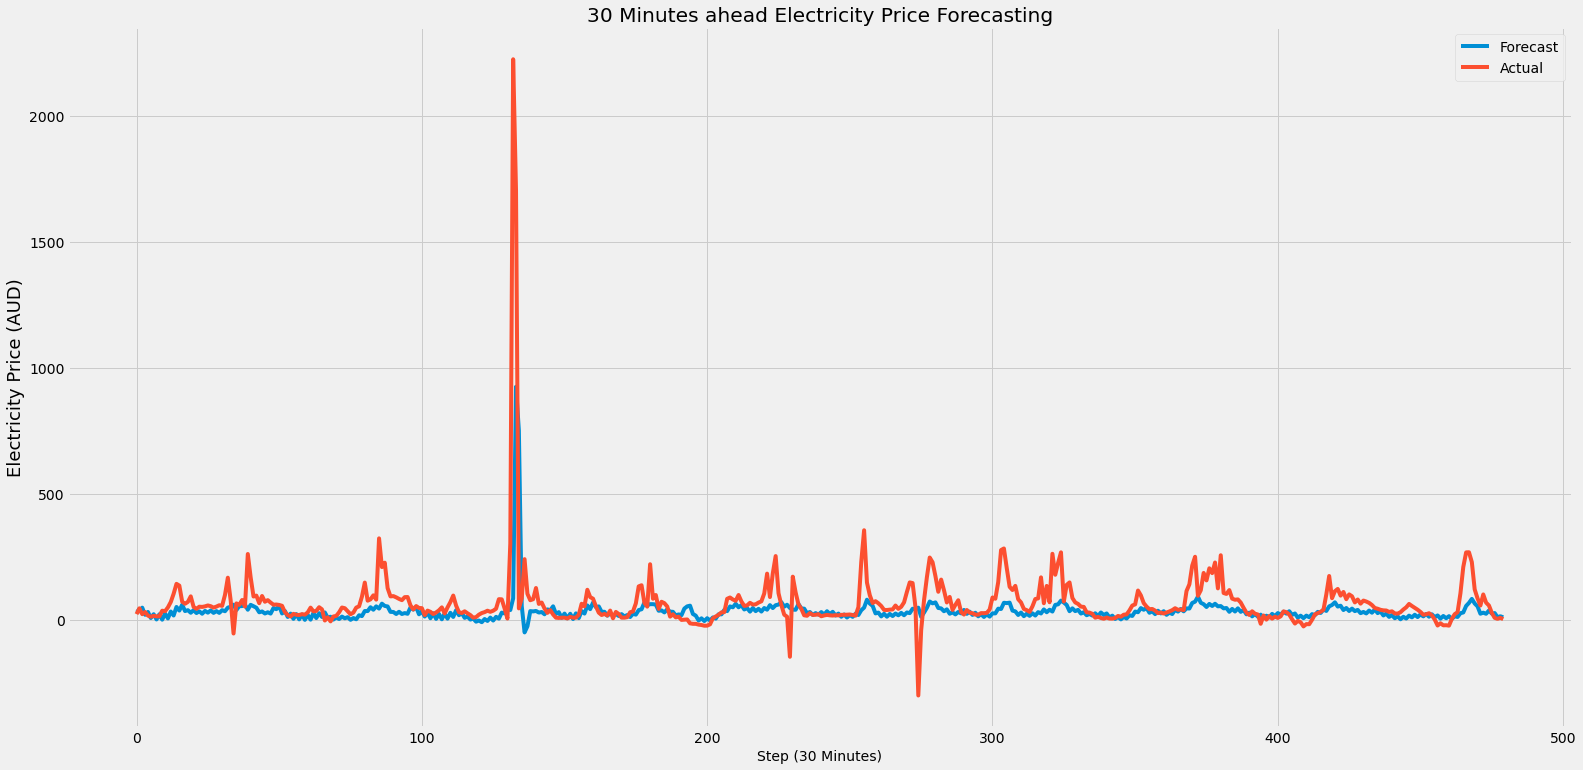

In [155]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(24,12))
plt.title('30 Minutes ahead Electricity Price Forecasting')
plt.xlabel('Step (30 Minutes)', fontsize=14)
plt.ylabel('Electricity Price (AUD)', fontsize=18)
plt.plot(predictions)
plt.plot(scaler.inverse_transform(y_test))
plt.legend(['Forecast', 'Actual'])
plt.show()

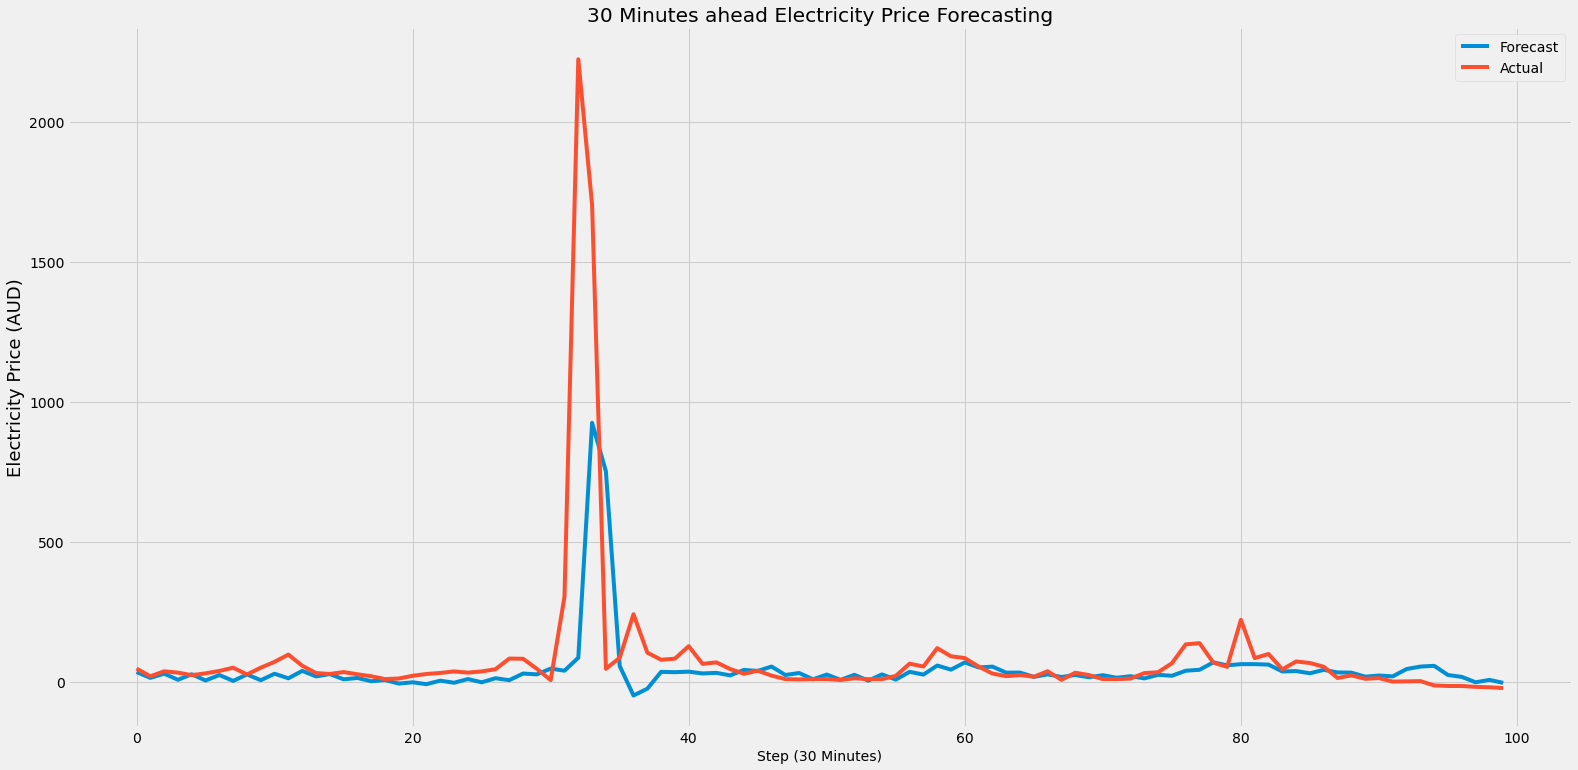

In [156]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(24,12))
plt.title('30 Minutes ahead Electricity Price Forecasting')
plt.xlabel('Step (30 Minutes)', fontsize=14)
plt.ylabel('Electricity Price (AUD)', fontsize=18)
plt.plot(predictions[100:200])
plt.plot(scaler.inverse_transform(y_test)[100:200])
plt.legend(['Forecast', 'Actual'])
plt.show()